In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, roc_auc_score

# Import Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI/dataset.csv')

In [ ]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


# Feature Engineering

In [ ]:
# Remvoing useless variables
df.drop(columns=['referral_source', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured'], inplace=True)

In [ ]:
# Removing variables which are vague and without context
df.drop(columns=['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid'], inplace=True)

In [ ]:
df = df.replace('?', np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3771 non-null   object 
 1   sex              3622 non-null   object 
 2   sick             3772 non-null   object 
 3   pregnant         3772 non-null   object 
 4   thyroid_surgery  3772 non-null   object 
 5   lithium          3772 non-null   object 
 6   goitre           3772 non-null   object 
 7   tumor            3772 non-null   object 
 8   hypopituitary    3772 non-null   object 
 9   psych            3772 non-null   object 
 10  TSH              3403 non-null   object 
 11  T3               3003 non-null   object 
 12  TT4              3541 non-null   object 
 13  T4U              3385 non-null   object 
 14  FTI              3387 non-null   object 
 15  TBG              0 non-null      float64
 16  Class            3772 non-null   object 
dtypes: float64(1),

In [ ]:
df = df.drop('TBG',axis=1)

In [ ]:
# menghapus missing value
df = df.dropna()

In [ ]:
df.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid_surgery    0
lithium            0
goitre             0
tumor              0
hypopituitary      0
psych              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Class              0
dtype: int64

## Type Conversion

In [ ]:
df[['TSH','T3','TT4','T4U','FTI']] = df[['TSH','T3','TT4','T4U','FTI']].astype(float)

In [ ]:
df['age'] = df['age'].astype(int)

## Encoding Categorical Variables

In [ ]:
cat_vars = ['sex', 'sick', 'pregnant', 'thyroid_surgery', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']

In [ ]:
df[cat_vars] = df[cat_vars].apply(lambda x: np.where(x=='t', True, np.where(x=='f', False, x)))
df[cat_vars].head()

,sex,sick,pregnant,thyroid_surgery,lithium,goitre,tumor,hypopituitary,psych
0,F,False,False,False,False,False,False,False,False
4,F,False,False,False,False,False,False,False,False
7,F,False,False,False,False,False,False,False,False
8,F,False,False,False,False,False,True,False,False
9,M,False,False,False,False,False,False,False,False


In [ ]:
# remame labels
df = df.replace({'negative':0,'sick':1})

## Duplicate Value Inspection

In [ ]:
df.duplicated().sum()

1

In [ ]:
# Dropping the Duplicate Observations
df.drop_duplicates(ignore_index=True, inplace=True)

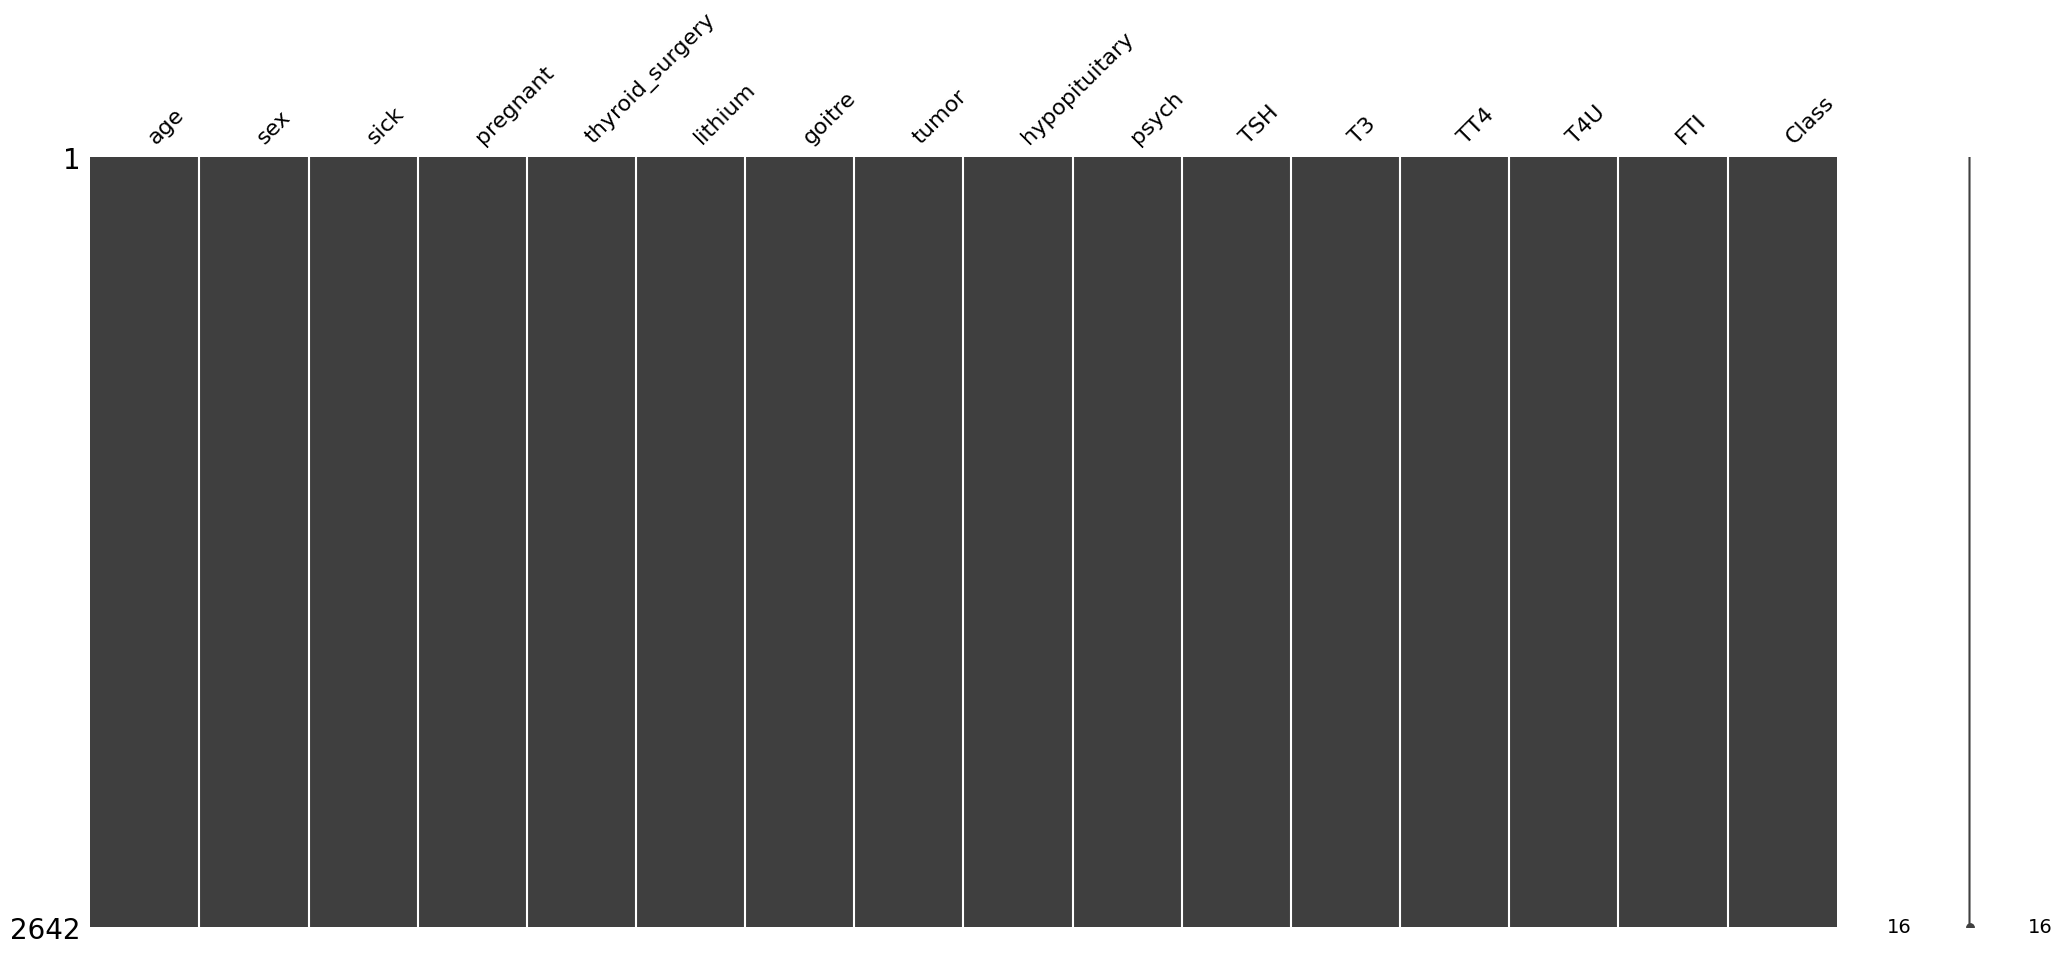

In [ ]:
import missingno as msno
os.makedirs('plots')

msno.matrix(df)
plt.savefig('plots/missing_value_matrix.png', bbox_inches='tight')
plt.show()

## Separating Features and Target Variable

In [ ]:
X = df[df.columns.difference(['Class'])]
y = df['Class']
print('Thyroid Data : {}\nFeatures :{}\nTarget : {}'.format(df.shape, X.shape, y.shape))

Thyroid Data : (2642, 16)
Features :(2642, 15)
Target : (2642,)


In [ ]:
num_vars = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
cat_vars = [var for var in X.columns if var not in num_vars]
binary_vars = [var for var in cat_vars if var != 'sex']
print('Numerical Variables : {} \nLength : {}'.format(num_vars, len(num_vars)))
print('Categorical Variables : {} \nLength : {}'.format(cat_vars, len(cat_vars)))
print('Binary Variables : {} \nLength : {}'.format(binary_vars, len(binary_vars)))

Numerical Variables : ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'] 
Length : 6
Categorical Variables : ['goitre', 'hypopituitary', 'lithium', 'pregnant', 'psych', 'sex', 'sick', 'thyroid_surgery', 'tumor'] 
Length : 9
Binary Variables : ['goitre', 'hypopituitary', 'lithium', 'pregnant', 'psych', 'sick', 'thyroid_surgery', 'tumor'] 
Length : 8


# Exploratory Data Analysis

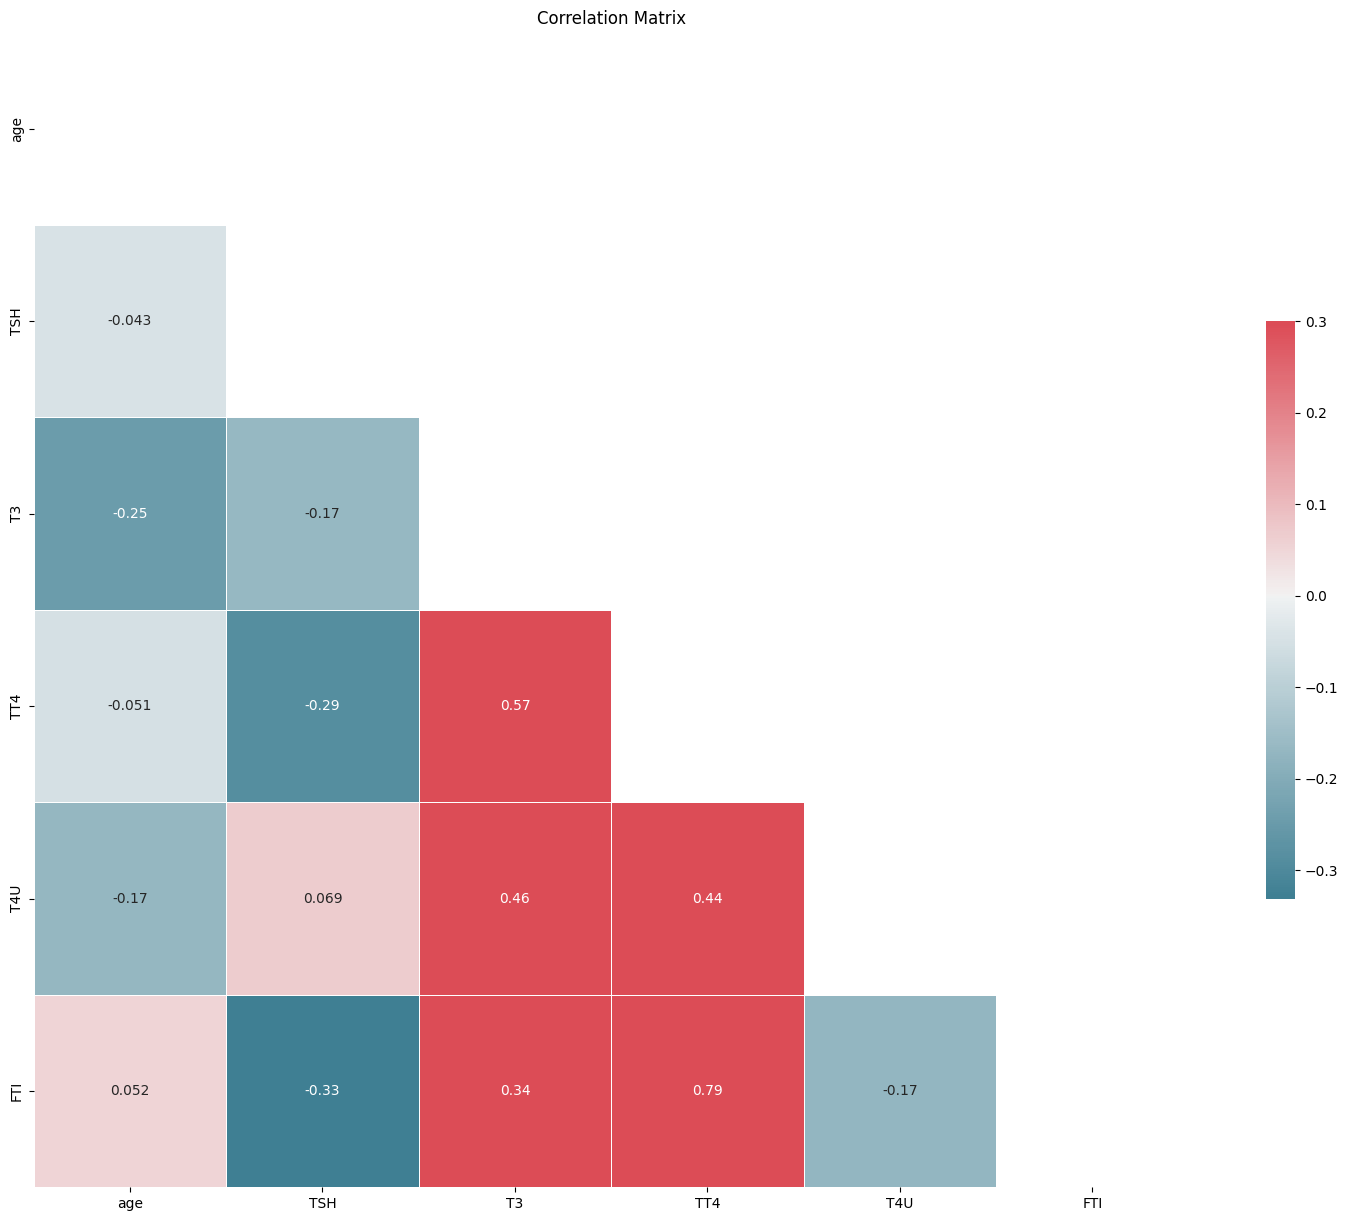

In [ ]:
corr_matrix = df[num_vars].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))  # Ensuring the subplot is correctly defined with a variable for the figure 'f'

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix')

plt.show()

In [ ]:
df[num_vars].iloc[:,1]

0       1.30
1       0.72
2       2.20
3       0.60
4       2.40
        ... 
2637    8.80
2638    1.00
2639    5.10
2640    0.70
2641    1.00
Name: TSH, Length: 2642, dtype: float64

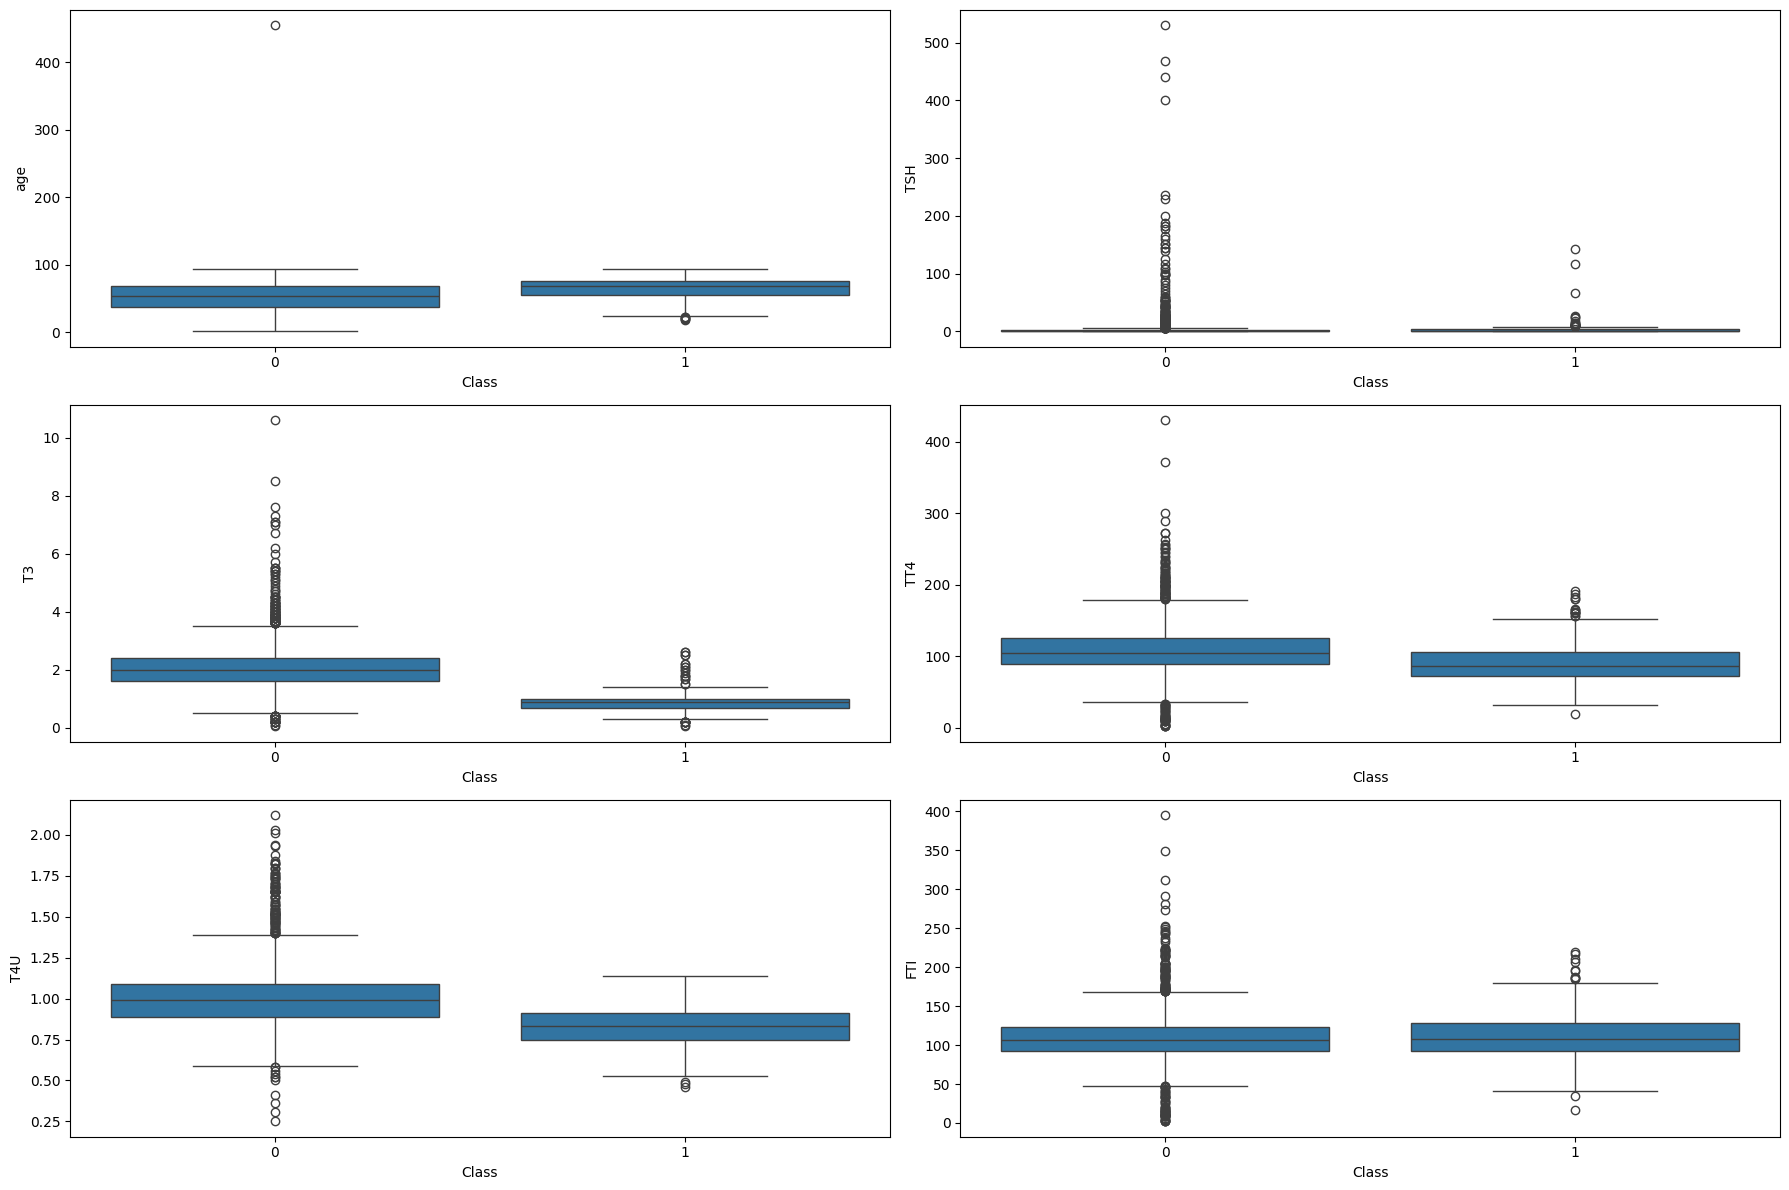

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.boxplot(data=df, x='Class', y=df[num_vars].iloc[:,i], ax=ax[i])
plt.tight_layout()
plt.show()

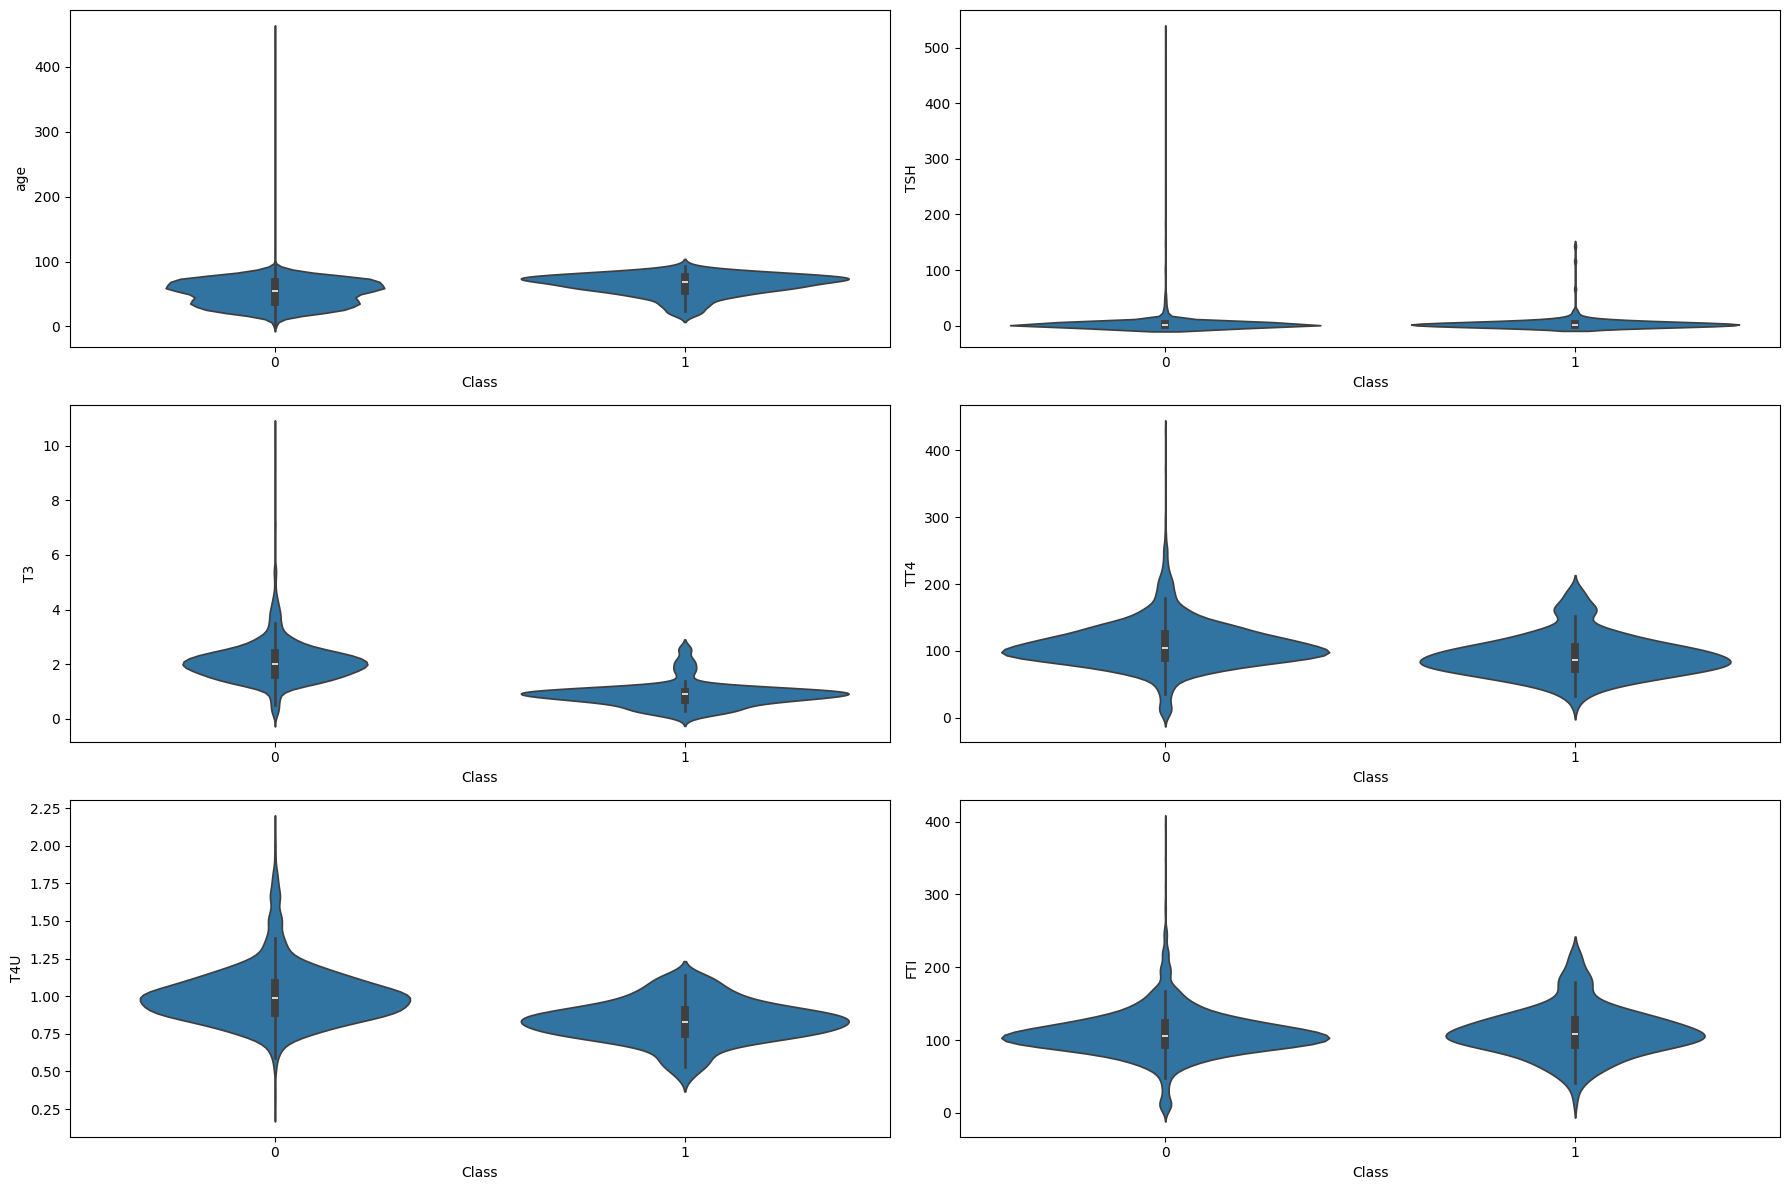

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.violinplot(data=df, x='Class', y=df[num_vars].iloc[:,i], ax=ax[i])
plt.tight_layout()
plt.show()

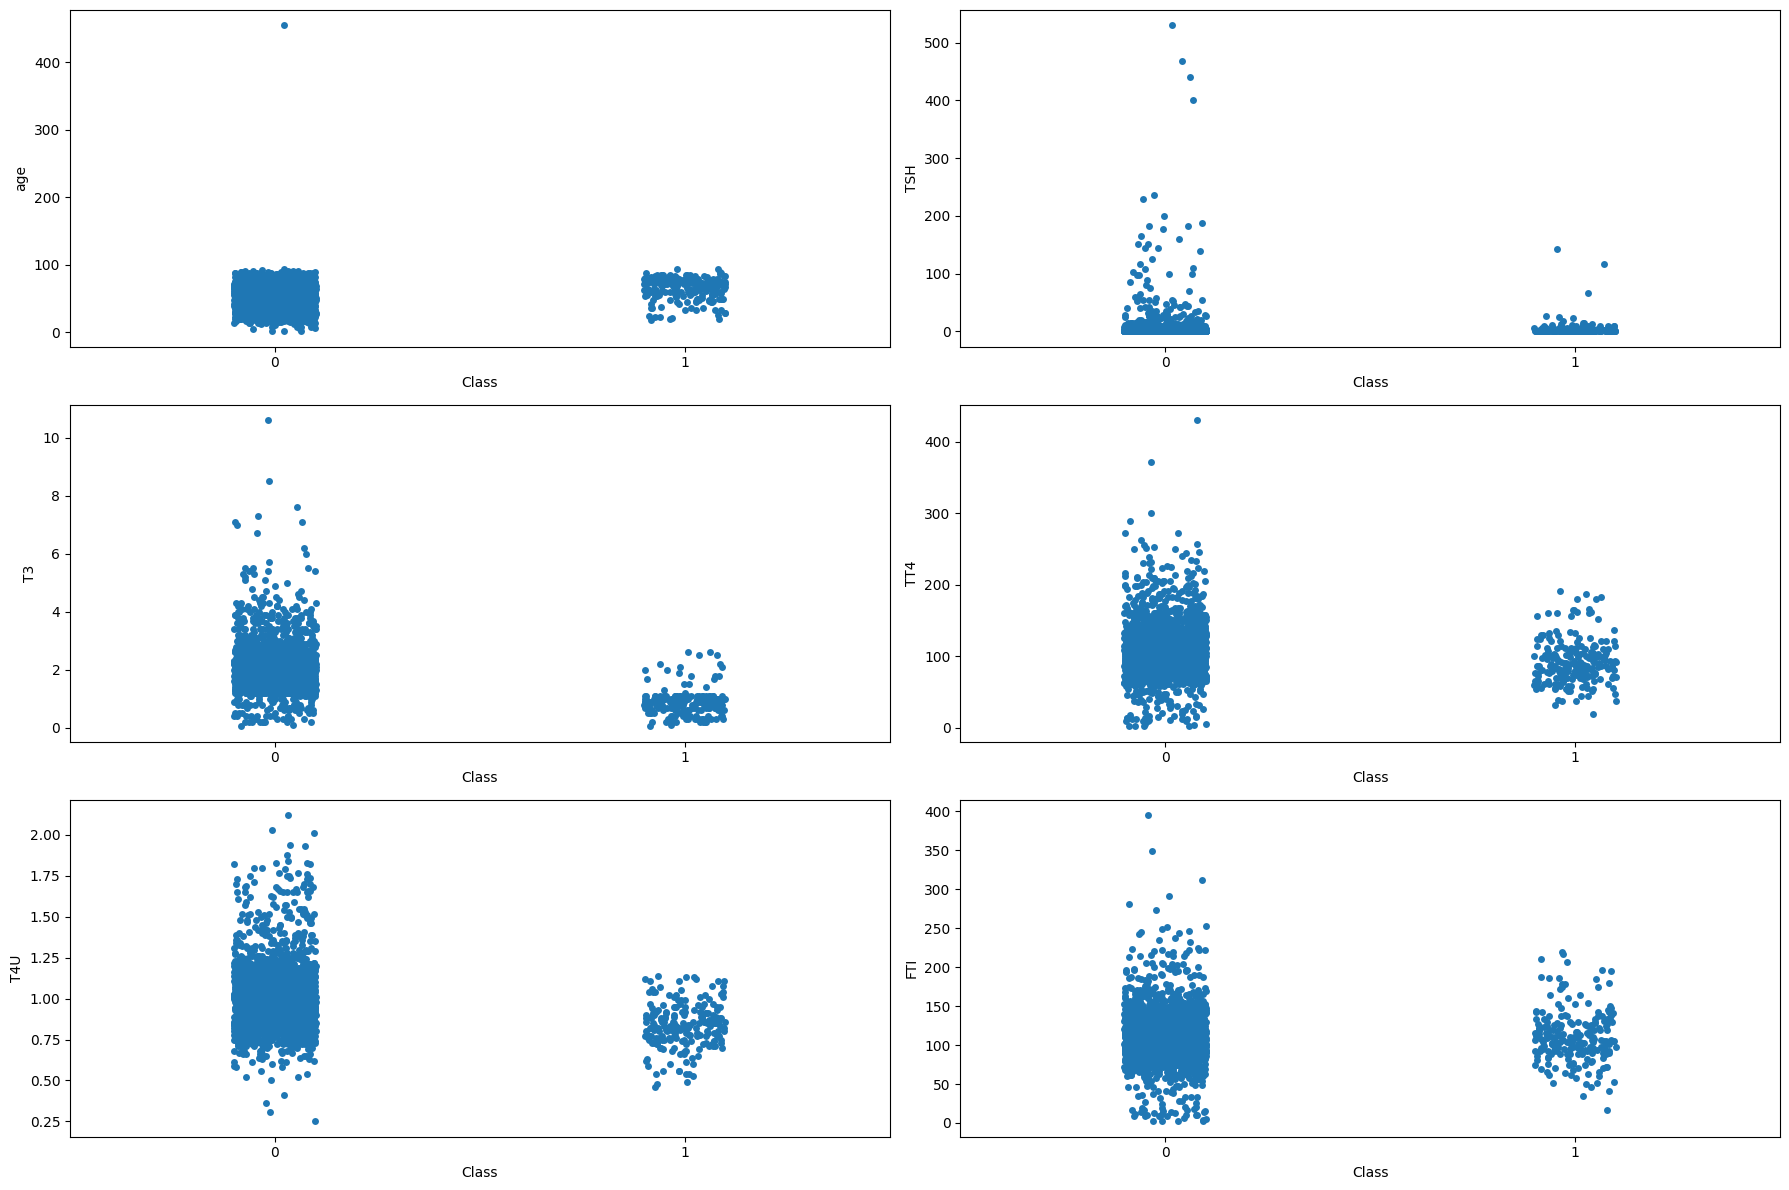

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.stripplot(data=df, x='Class', y=df[num_vars].iloc[:,i], ax=ax[i])
plt.tight_layout()
plt.show()

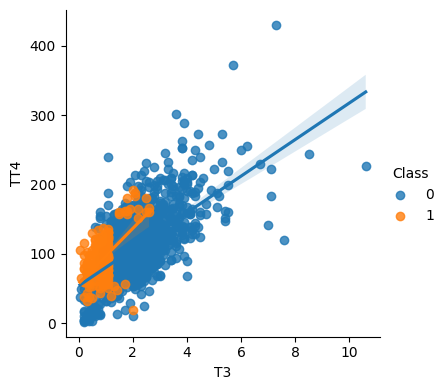

In [ ]:
sns.lmplot(data=df, x='T3', y='TT4', hue='Class', height=4)

# Data Pre-Processing

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=12345)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(1849, 15)
(793, 15)
(1849,)
(793,)


## Outlier Treatment

In [ ]:
outliers_ucap = {}
outliers_lcap = {}
for num_var in num_vars:
    if num_var == 'age':
        outliers_lcap[num_var] = round(train_x[num_var].dropna().quantile(0.001),2)
        outliers_ucap[num_var] = round(train_x[num_var].dropna().quantile(0.999),2)
    else:
        outliers_lcap[num_var] = round(train_x[num_var].dropna().quantile(0.01),2)
        outliers_ucap[num_var] = round(train_x[num_var].dropna().quantile(0.99),2)
print('Lower Cap :',outliers_lcap)
print('Upper Cap :',outliers_ucap)

Lower Cap : {'age': 1.85, 'TSH': 0.0, 'T3': 0.3, 'TT4': 17.0, 'T4U': 0.61, 'FTI': 17.0}
Upper Cap : {'age': 92.15, 'TSH': 98.52, 'T3': 5.0, 'TT4': 228.08, 'T4U': 1.69, 'FTI': 219.52}


In [ ]:
import pickle

directory = "object instances"
os.makedirs(directory)

# For outliers_lcap
# create a binary pickle file
f1 = open("object instances/outliers_lcap.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(outliers_lcap,f1)

# close file
f1.close()

# For outliers_ucap
f2 = open("object instances/outliers_ucap.pkl","wb")
pickle.dump(outliers_ucap,f2)
f2.close()

In [ ]:
# For Training Data
for num_var in num_vars:
    if num_var == 'age':
        train_x[num_var] = train_x[num_var].clip(lower=train_x[num_var].dropna().quantile(0.001), upper=train_x[num_var].dropna().quantile(0.999))
    else:
        train_x[num_var] = train_x[num_var].clip(lower=train_x[num_var].dropna().quantile(0.01), upper=train_x[num_var].dropna().quantile(0.99))

In [ ]:
# For Testing Data
for num_var in num_vars:
    test_x[num_var] = test_x[num_var].clip(lower= outliers_lcap[num_var], upper=outliers_ucap[num_var])

## Missing Values Treatment

In [ ]:
train_x.isna().sum()

FTI                0
T3                 0
T4U                0
TSH                0
TT4                0
age                0
goitre             0
hypopituitary      0
lithium            0
pregnant           0
psych              0
sex                0
sick               0
thyroid_surgery    0
tumor              0
dtype: int64

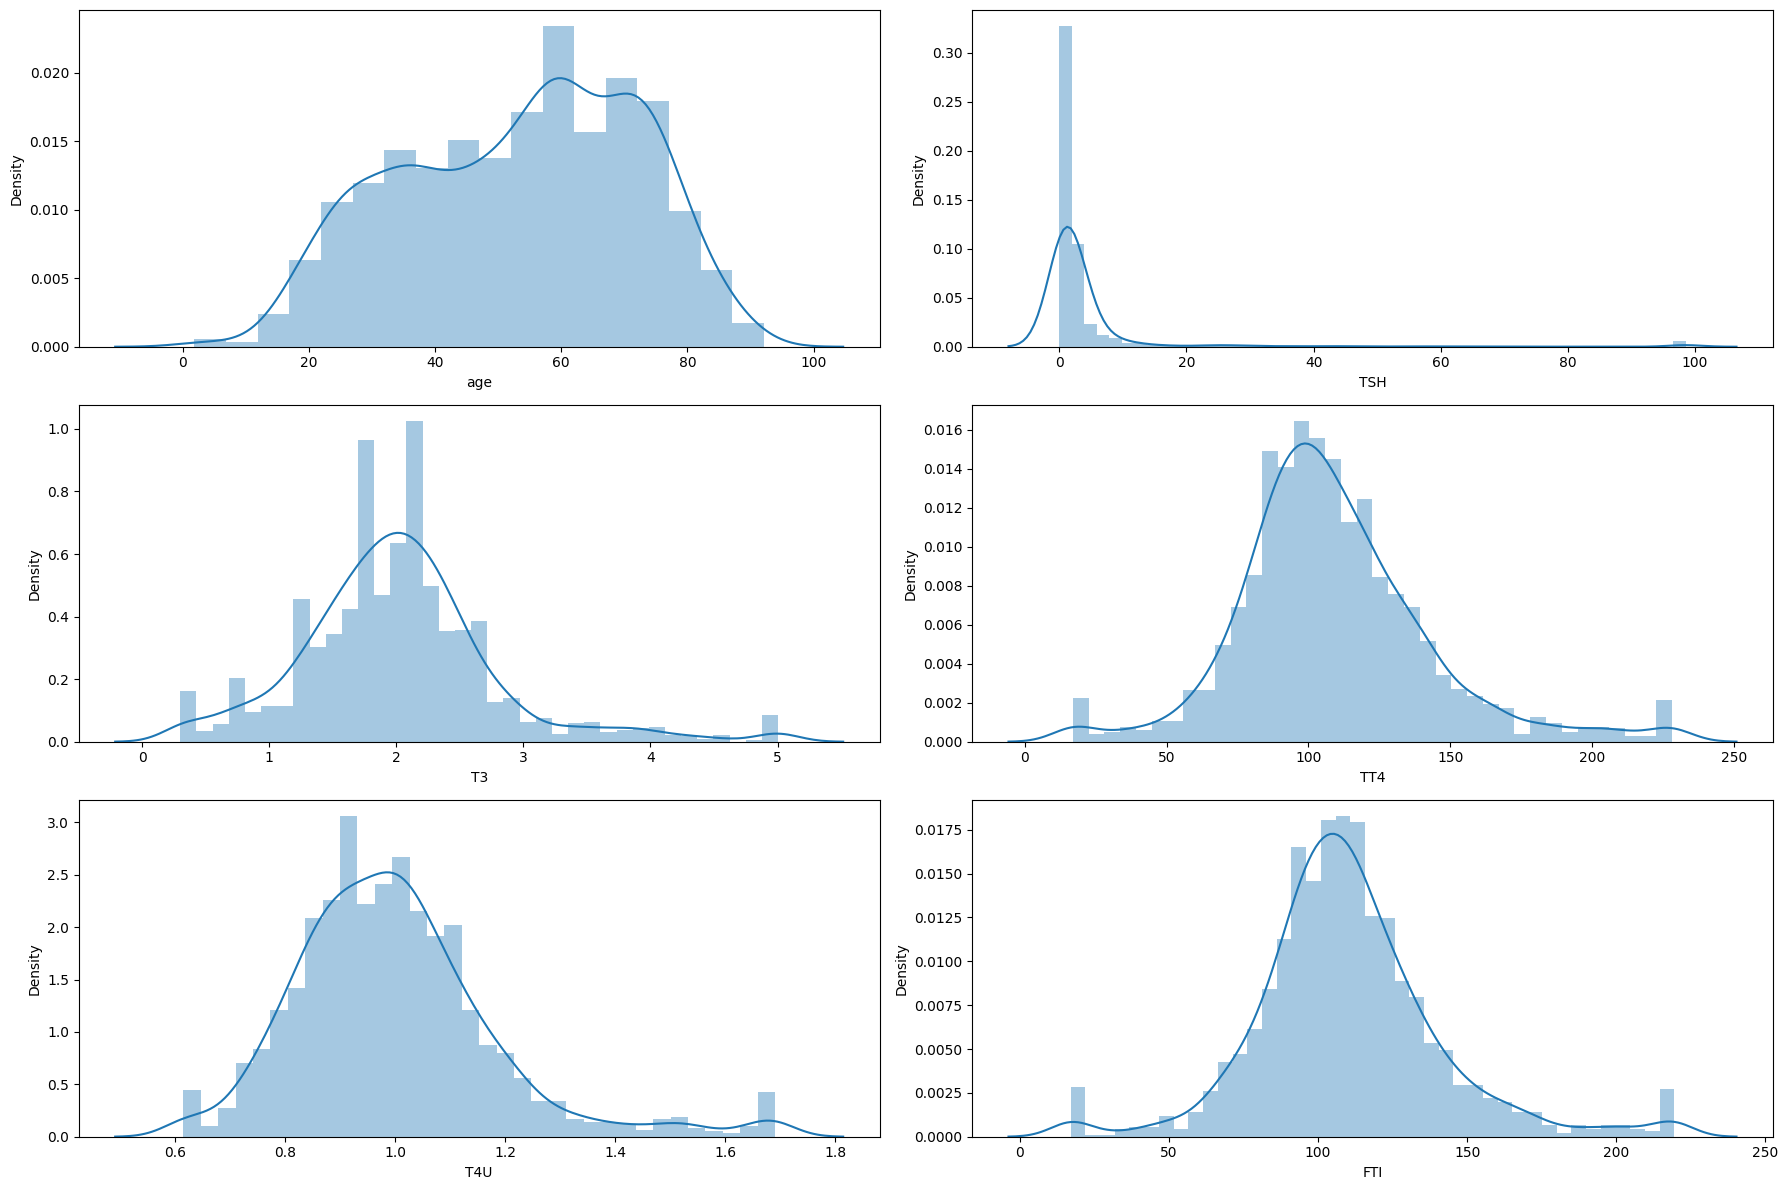

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
ax = ax.flatten()

for i in range(len(ax)):
    ax[i] = sns.distplot(train_x[num_vars].iloc[:,i], kde=True, ax=ax[i])
plt.tight_layout()
plt.savefig('plots/Distribution Plots for Numerical Data.png', bbox_inches = 'tight')
plt.show()

In [ ]:
num_vars

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [ ]:
missing_imputation = {}
for num_var in train_x.columns:
    if num_var in ['age', 'T3', 'TT4', 'T4U', 'FTI']:
        missing_imputation[num_var] = round(train_x[num_var].dropna().mean(),2)
    elif num_var == 'TSH':
        missing_imputation[num_var] = round(train_x[num_var].dropna().median(),2)
    elif num_var == 'sex':
        missing_imputation[num_var] = train_x[num_var].dropna().mode()[0]
    else:
        continue
print(missing_imputation)

{'FTI': 109.88, 'T3': 2.01, 'T4U': 1.0, 'TSH': 1.3, 'TT4': 108.54, 'age': 53.22, 'sex': 'F'}


In [ ]:
# Dumping the information about Missing Value Imputation into a pickle file
f = open("object instances/missing_imputation.pkl","wb")
pickle.dump(missing_imputation,f)
f.close()

In [ ]:
for num_var in train_x.columns:
    if num_var in missing_imputation.keys():
        train_x[num_var] = train_x[num_var].fillna(missing_imputation[num_var])
        test_x[num_var] = test_x[num_var].fillna(missing_imputation[num_var])
    else:
        continue
if train_x.isna().sum().sum() == 0:
    print('Missing Value Imputation on Training Data is Done')
if test_x.isna().sum().sum() == 0:
    print('Missing Value Imputation on Testing Data is Done')

Missing Value Imputation on Training Data is Done
Missing Value Imputation on Testing Data is Done


## Encoing the Categorical Variables

In [ ]:
# For 'Sex' Variable : 'M' - 1 and 'F' - 0
train_x.sex = train_x.sex.map({'M':1, 'F':0})
test_x.sex = test_x.sex.map({'M':1, 'F':0})

In [ ]:
# For all the other Variables : 'True' - 1 and 'False' - 0
train_x[cat_vars] = train_x[cat_vars].apply(lambda x: np.where(x==True, 1, 0))
test_x[cat_vars] = test_x[cat_vars].apply(lambda x: np.where(x==True, 1, 0))
train_x.head()

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid_surgery,tumor
1020,97.0,4.5,1.65,0.6,161.0,59.0,0,0,0,0,0,0,0,0,0
581,109.0,2.8,1.13,2.4,122.0,24.0,0,0,0,0,0,1,0,0,0
2504,98.0,2.5,1.11,1.5,109.0,33.0,0,0,0,0,0,0,0,0,0
101,131.0,1.1,1.01,4.5,132.0,75.0,0,0,0,0,0,0,0,0,0
653,149.0,1.8,0.92,1.5,136.0,69.0,0,0,0,0,0,0,0,0,0


## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
from sklearn.compose import ColumnTransformer

scaler = ColumnTransformer([('scaler', StandardScaler(), ['FTI', 'T3', 'T4U', 'TSH', 'TT4', 'age'])], remainder='passthrough')

In [ ]:
train_x_scaled = pd.DataFrame(scaler.fit_transform(train_x), columns=train_x.columns)
train_x_scaled

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid_surgery,tumor
0,-0.412244,3.242910,3.507335,-0.283722,1.543221,0.307988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.028049,1.029728,0.709469,-0.133717,0.395906,-1.555635,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.380227,0.639166,0.601858,-0.208720,0.013468,-1.076418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.676308,-1.183454,0.063807,0.041288,0.690089,1.159930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.252600,-0.272144,-0.420439,-0.208720,0.807763,0.840452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,-0.892487,-0.662706,-0.312829,-0.331640,-0.927919,1.053438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1845,-0.668374,-0.923080,0.117612,-0.300389,-0.516062,1.000191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1846,-0.284179,0.769354,0.332833,-0.308723,-0.074787,-1.715375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1847,1.988974,-0.662706,-0.474244,-0.317056,1.425548,-1.076418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
os.makedirs('models')
# Dumping the scaler into a pickle file
file = open('models/scaler.pkl', 'wb' )

pickle.dump(scaler, file)

file.close()

In [ ]:
test_x_scaled = pd.DataFrame(scaler.transform(test_x), columns=train_x.columns)
test_x_scaled

,FTI,T3,T4U,TSH,TT4,age,goitre,hypopituitary,lithium,pregnant,psych,sex,sick,thyroid_surgery,tumor
0,-0.028049,0.508979,-0.151413,-0.242054,-0.074787,-0.863432,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-0.924503,-0.662706,-0.420439,-0.297056,-0.986755,-1.182911,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.228081,-1.053267,-1.119905,-0.292055,-0.457225,1.692394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.020552,2.722161,3.722555,-0.150385,1.425548,-1.395896,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.060503,-0.141957,0.171417,-0.327056,1.131364,-1.236157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,-0.380227,-0.011770,-0.151413,-0.317056,-0.427807,-0.224476,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
789,-0.028049,0.508979,-1.335126,-0.252888,-0.810245,-0.969925,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
790,1.124535,-1.183454,-0.797075,-0.133717,0.454743,0.520974,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
791,-0.572325,0.639166,-0.151413,-0.297056,-0.574899,0.574220,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## OverSampling

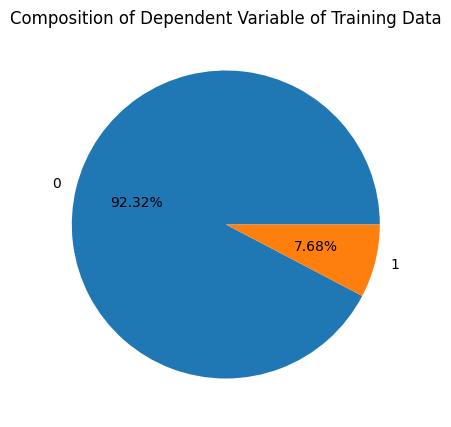

In [ ]:
import matplotlib.pyplot as plt

# Assuming train_y is defined and contains the data
plt.figure(figsize=(5,5))
plt.pie(train_y.value_counts(), autopct='%.2f%%', labels=train_y.value_counts().index)
plt.title('Composition of Dependent Variable of Training Data')
plt.savefig('plots/Piechart_train_y.png', bbox_inches='tight')  # Corrected the typo here
plt.show()

In [ ]:
train_y.value_counts()

Class
0    1707
1     142
Name: count, dtype: int64

In [ ]:
test_y.value_counts()

Class
0    723
1     70
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=12345)
train_x_os, train_y_os = oversampler.fit_resample(train_x, train_y)
train_y_os.value_counts()

Class
0    1707
1    1707
Name: count, dtype: int64

# Data Modelling

## Support Vector Machine

## Gradient Boosting Classifier

## XGBoost Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [ ]:
# Define the pipeline
resampling = SMOTE(sampling_strategy='minority') # resampling strategy is set to 'minority' to resample the minority class
tomek = TomekLinks(sampling_strategy='majority') # sampling strategy is set to 'majority' to undersample the majority class
scaler = MinMaxScaler()
model = XGBClassifier(scale_pos_weight=sum(y==0)/sum(y==1), # adjust class weights due to class imbalance
                      eval_metric='logloss', # use logloss to evaluate performance
                      use_label_encoder=False) # to avoid warning message
pipeline = Pipeline([('MinMaxScale', scaler), ('SMOTE', resampling), ('TomekLinks', tomek), ('Model', model)])

In [ ]:
# Define the model with default hyperparameters
model = XGBClassifier()

# define the datasets to evaluate each iteration
evalset = [(train_x, train_y), (test_x, test_y)]

# fit the model
model.fit(train_x, train_y, eval_metric='logloss', eval_set=evalset, verbose=False)

# evaluate performance
y_pred = model.predict(test_x)
score = accuracy_score(test_y, y_pred)
print('Accuracy: %.4f' % score)
y_score = model.predict_proba(test_x)[:,1]

Accuracy: 0.9786


In [ ]:
# Print the classification report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       723
           1       0.86      0.90      0.88        70

    accuracy                           0.98       793
   macro avg       0.93      0.94      0.93       793
weighted avg       0.98      0.98      0.98       793



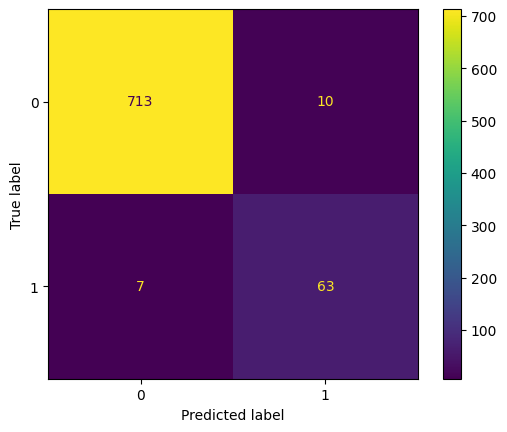

In [ ]:
# Make predictions on the test set
y_pred = model.predict(test_x)

# Compute the confusion matrix
cm = confusion_matrix(test_y, y_pred, labels=model.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

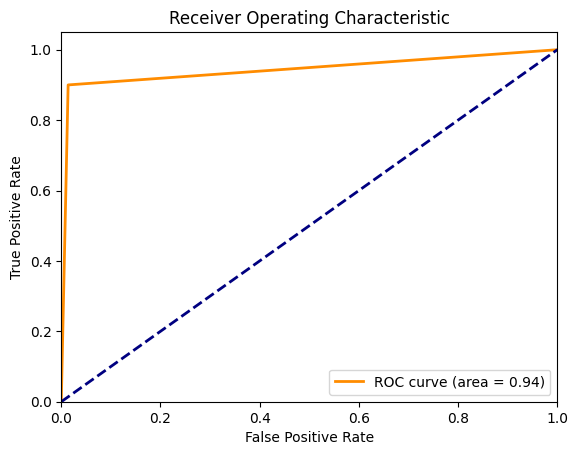

In [ ]:
# Compute ROC curve and ROC area
fpr_optimized, tpr_optimized, _ = roc_curve(test_y, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

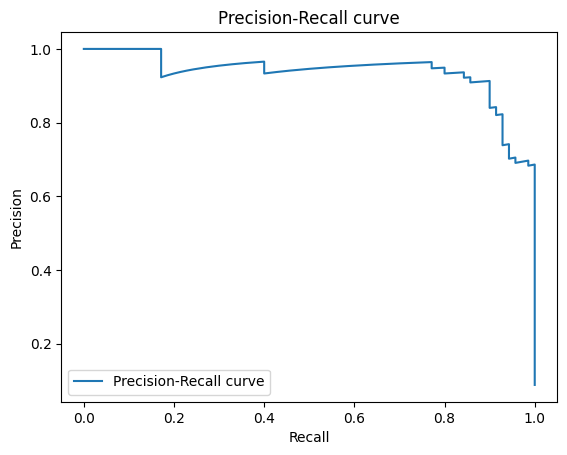

In [ ]:
# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(test_y, y_score)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

plt.show()

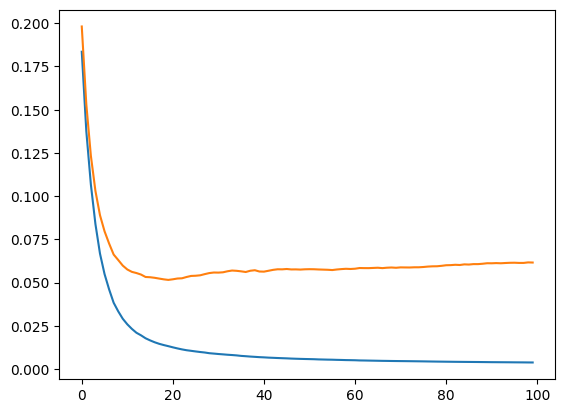

In [ ]:
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')

In [ ]:
# # Plot the learning curve
# train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
# plt.figure()
# plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
# plt.plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
# plt.xlabel('Training set size')
# plt.ylabel('Score')
# plt.title('Learning curve')
# plt.legend(loc="lower right")
# plt.show()

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model1 = AdaBoostClassifier(n_estimators=100,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
    base_estimator='deprecated')

In [ ]:
model1.fit(train_x, train_y)

AdaBoostClassifier(n_estimators=100)

In [ ]:
y_pred1 = model1.predict(test_x)
y_score1 = model1.predict_proba(test_x)[:,1]

In [ ]:
print(classification_report(test_y, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       723
           1       0.84      0.84      0.84        70

    accuracy                           0.97       793
   macro avg       0.91      0.91      0.91       793
weighted avg       0.97      0.97      0.97       793



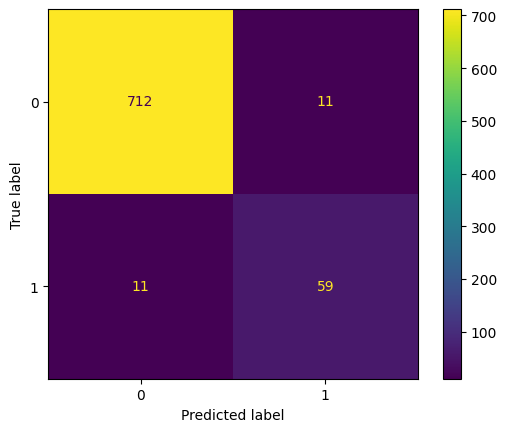

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(test_y, y_pred1, labels=model1.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

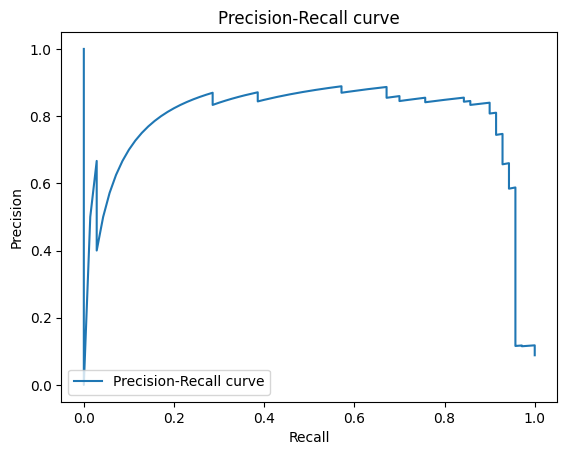

In [ ]:
# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(test_y, y_score1)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")

plt.show()

In [ ]:
# train_sizes, train_scores, val_scores = learning_curve(
#     estimator=model1,
#     X=train_x,
#     y=train_y,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1
# )
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# validation_mean = np.mean(val_scores, axis=1)
# validation_std = np.std(val_scores, axis=1)
# plt.figure(figsize=(8, 6))
# plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
# plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Testing score")
# plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color="g")

# plt.title("Learning Curve for AdaBoost")
# plt.xlabel("Training examples")
# plt.ylabel("Score")
# plt.legend(loc="best")
# plt.grid()
# plt.show()

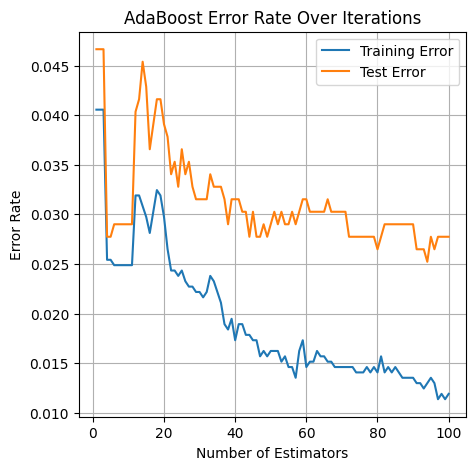

In [ ]:
# Initialize lists to store errors
train_errors = []
test_errors = []

# Iterate through stages of AdaBoost
for train_pred, test_pred in zip(model1.staged_predict(train_x), model1.staged_predict(test_x)):
    train_errors.append(1 - accuracy_score(train_y, train_pred))
    test_errors.append(1 - accuracy_score(test_y, test_pred))

# Get the number of estimators
n_estimators = len(model1.estimators_)

# Create a range for the number of iterations
estimators = np.arange(n_estimators) + 1

plt.figure(figsize=(5, 5))
plt.plot(estimators, train_errors, label='Training Error')
plt.plot(estimators, test_errors, label='Test Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.title('AdaBoost Error Rate Over Iterations')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [83]:
# retrieve performance metrics
results = model1.evals_result()
# plot learning curves
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')

AttributeError: 'AdaBoostClassifier' object has no attribute 'evals_result'